**GTU Case Study**

* Task: To Create Smart Tool Help to Recoginze Best Candidate Early
* Offer Right Number Of Scholarships without Running out of money
* Send Offer Students earliar so they get their visas on time

**Step # A**

 **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Step # B**

**Upload  Dataset**

In [220]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [264]:
# Read the data
df = pd.read_csv("/content/Admission_Predict.csv")

In [265]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


**STEP # 1**

**Data Explore**

In [266]:
df.shape #400 rows, 9 columns (8 Inputs, 1 Output)

(400, 9)

In [267]:
df.head(20)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


In [269]:
df.isnull().sum() # For missing values

,0
Serial No.,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


# Implies value.count function
it's help to analyze column in a way to check whether it's countinous in nature or categorical.
Also it tell us about number of unique values in that particular column with count which tell us about how many time that unique value repeated which help to identify the column is countinous or categorical.

In [270]:
df['SOP'].value_counts() #After analysis it's categoriacl cuz having less then 10 unique values

,count
SOP,
4.0,70
3.5,70
3.0,64
4.5,53
2.5,47
5.0,37
2.0,33
1.5,20
1.0,6


In [271]:
df['Research'].value_counts()


,count
Research,
1,219
0,181


In [272]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [273]:
df['CGPA'].value_counts()

,count
CGPA,
8.00,9
8.76,8
8.56,7
8.64,6
8.45,6
...,...
9.62,1
7.56,1
9.74,1


In [274]:
df['LOR '].value_counts()

,count
LOR,
3.0,85
4.0,77
3.5,73
4.5,45
2.5,39
2.0,38
5.0,35
1.5,7
1.0,1


So, here CGPA is clearly shown after value count that it is countinous in nature
mean while SOP,LOR,Research is categrical in nature

In [275]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


**Structure to visualize statistical overview**

**count:** It tells about how many actual data points are present in that column.If the count is less than the total rows, it means some missing (NaN) values exist in that column.

**Mean & Q3:** help to visualize about the distribution like clue like either distribution is normal or not

**Std:** Help us to detect ouliears in column how much like about average estimate of outliears detect in each column

**min/max :** help also tell us about outliears in more depth like dive into data and tell and detect outliers near or far to Q1 to min and Q3 to max

* If we consider output it shows that there is **NO MISSING** values as count value of each column is equal to number of rows.

* So **by compare Mean & Max** it indicate that there is just **20 to 25%** **difference between both of them by passing every column, which gernally indicate that features are **not heavily skewed** and or has **no extreme outliers.**

It's just statistical based summary as if we want more clarity we considered hist plot or box plot concepts to detect them visually.

Now Implies **Drop Function on Serial.no**, cus it's just for general purpose in dataset as we prepare data for model traning it may make process further complex.

In [276]:
df.drop('Serial No.',axis=1,inplace=True) # inplace = True is consider to fix operation in dataset / axis = 1 implies operation on column

In [277]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


Here, Serial.no column is sucessfully deleted

#**Duplication**

In [278]:
df.duplicated().sum()

np.int64(0)

* Difference Between** df.duplicated()** and **df.duplicated().sum()**

Basically duplication operation in pandas is for rows it work in two ways

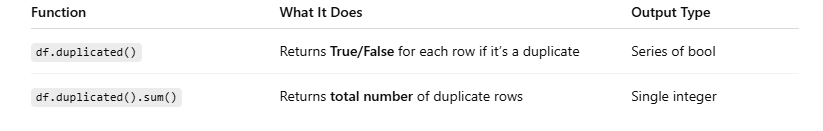

**df.duplicated():** Check which rows are duplicates

**df.duplicated().sum():** Count how many duplicates

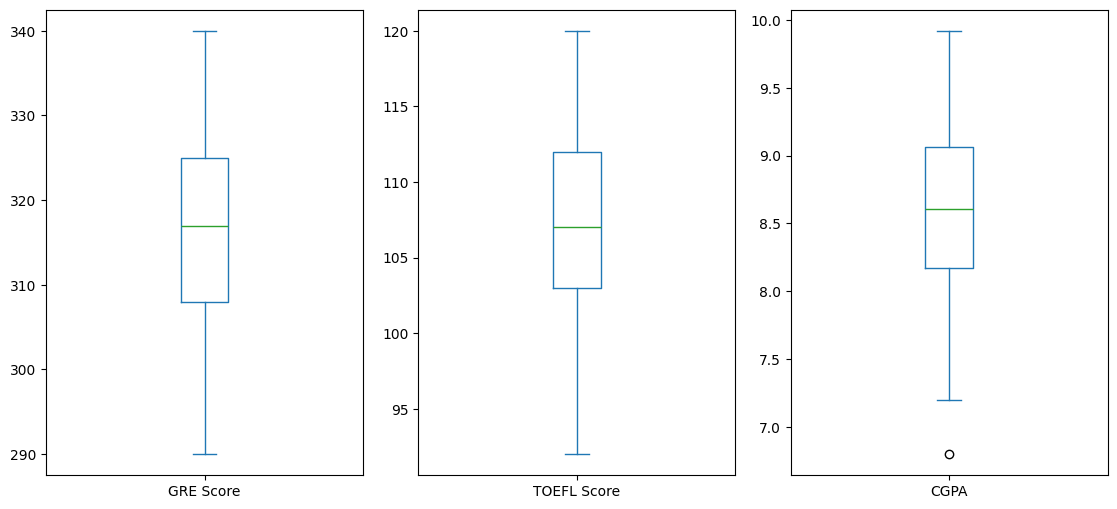

In [279]:
x_columns = ['GRE Score','TOEFL Score','CGPA']

df[x_columns].plot(kind='box', subplots=True, layout=(2, 4), figsize=(15, 10))

plt.tight_layout()
plt.show()

* I consider GRE, TOFEL, CGPA cuz these are countinous in nature
* Rest SOP, LOR, Research, Rating all are categorical in nature
* And at last, Chance of admission is our targeted variable.

**Outliears History:**
 Now according to domain knowledge if i analyze this columns so i can say that it's oaky to be not tackle them because Score criteria is okay to be exceed from range cause it's vary from person to person. It's not impact in a way of any sort of error either it's help to analysis Best Candidate Earlier.

 So after all i observe that not all outliears are bad some are usefull if we analyze it on basis of realworld problems.


#**Categorical Column Analysis**
In most cases outliers are not need to be removed in categorical columns because due to there hirerchy or binary in nature there is less chance to detect error points as on the other hand continous ones, are quntitative in nature so they have high probability of low or high extreme values.

Same but slightly different of categorical on & off there will be cases find where we have to consider outliear

So i gona observe cate columns of the dataset i have let see what we got...

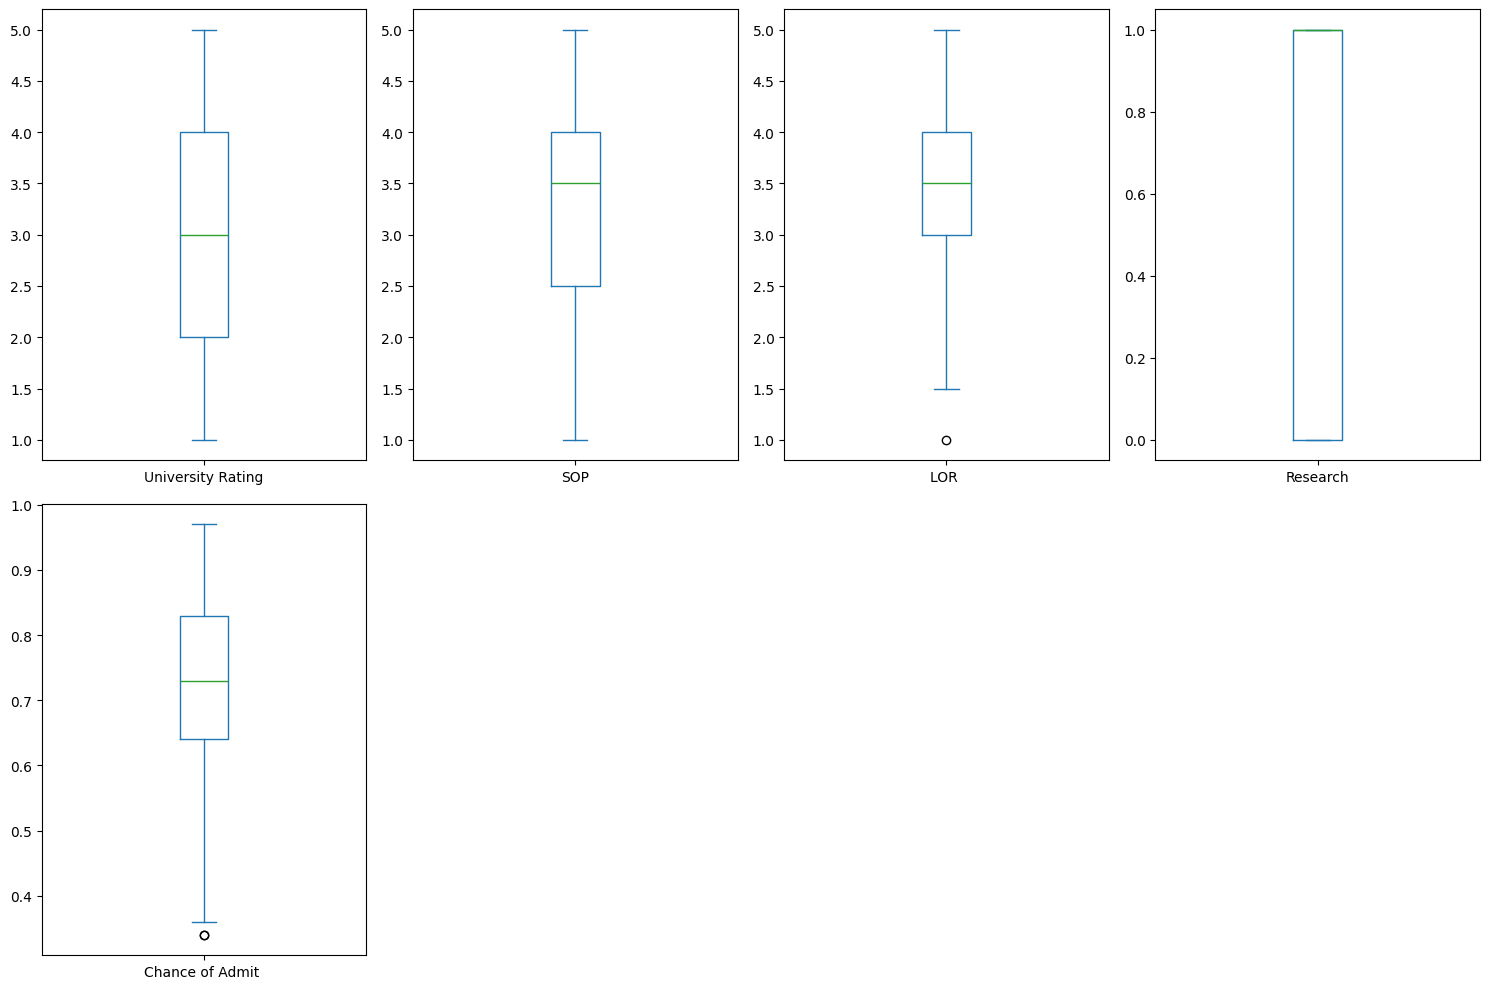

In [280]:
x_columns = ['University Rating', 'SOP',
       'LOR ', 'Research', 'Chance of Admit ']

df[x_columns].plot(kind='box', subplots=True, layout=(2, 4), figsize=(15, 10))

plt.tight_layout()
plt.show()

So,
University Rating, SOP has no outliears.

Where as LOR, Chance of Admission have outliears but it's okay to not to be removed cuz according to domain aspect this feature based on person and perfomance vary on basis of their commitments and chance of admission is also based on their overall acedemic & personal perfomance.

If we consider Research plot seems unusuall because it's categorical (nominal) & binary in nature have 0,1 values in columns and most of students there with having their research work.



#**Outliear Filteration process**


In [281]:
col = 'LOR '

# Calculate Q1, Q3 and IQR
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

# Print results
print("Number of outliers:", outliers.shape[0])
print(outliers)

Number of outliers: 1
     GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
347        299           94                  1  1.0   1.0  7.34         0   

     Chance of Admit   
347              0.42  


**PURPOSE OF DATA HANDLING BY IMPLIES OULIEAR FILTER:**
* As responsibility while explore data to try to deep dive so we provide clean prepare dataset to model for traning for that **after analyze outilear we filter those columns where we detect outliears just to ensure that ouliear we get on whcih basis is it valid or some time as it's a process of passing multiple application will data enter properly so for this sort of deep analysis Ouliear filter process is helpfull even we just want statics or we review that after visualization**

In [282]:
col = 'CGPA'

# Calculate Q1, Q3 and IQR
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

# Print results
print("Number of outliers:", outliers.shape[0])
print(outliers)

Number of outliers: 1
    GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
58        300           99                  1  3.0   2.0   6.8         1   

    Chance of Admit   
58              0.36  


#**Check Inconsistancies in data**

* **This is the process where we analyze that the info we have is in proper way either it's formate for text or date formate also for lower & upper case (Case Sensitive), datatype, empty spaces, missing values, repated data (duplication), outliears etc**.

* **-->** for that we consider **df[column].unique()** and many other according to required used scenerious like .replace(), .astype(), .strip(), lower(), etc.

* For any other implementation first we implies **unique()** operation to detect then to resolve we consider rest required operation as shown above.

**!! Warning:** As we done process of Outliear detection via box plot and filteration process so the process of Check inconsistance it's good for small dataset instead of large and complex as for the large set where we, consider process like box plot and outliears filteration process.

We though use this in large dataset as well but when a analyst is required to analyze dataset through different aspects and might they will think that he/she will be crack misshandling through this batch visualization process.

In [283]:
df['GRE Score'].unique()

array([337, 324, 316, 322, 314, 330, 321, 308, 302, 323, 325, 327, 328,
       307, 311, 317, 319, 318, 303, 312, 334, 336, 340, 298, 295, 310,
       300, 338, 331, 320, 299, 304, 313, 332, 326, 329, 339, 309, 315,
       301, 296, 294, 306, 305, 290, 335, 333, 297, 293])

In [284]:
df['CGPA'].unique()

array([9.65, 8.87, 8.  , 8.67, 8.21, 9.34, 8.2 , 7.9 , 8.6 , 8.4 , 9.  ,
       9.1 , 8.3 , 8.7 , 8.8 , 8.5 , 9.5 , 9.7 , 9.8 , 9.6 , 7.5 , 7.2 ,
       7.3 , 8.1 , 9.4 , 9.2 , 7.8 , 7.7 , 9.3 , 8.85, 7.4 , 7.6 , 6.8 ,
       8.92, 9.02, 8.64, 9.22, 9.16, 9.64, 9.76, 9.45, 9.04, 8.9 , 8.56,
       8.72, 8.22, 7.54, 7.36, 8.02, 9.36, 8.66, 8.42, 8.28, 8.14, 8.76,
       7.92, 7.66, 8.03, 7.88, 7.84, 8.96, 9.24, 8.88, 8.46, 8.12, 8.25,
       8.47, 9.05, 8.78, 9.18, 9.46, 9.38, 8.48, 8.68, 8.34, 8.45, 8.62,
       7.46, 7.28, 8.84, 9.56, 9.48, 8.36, 9.32, 8.71, 9.35, 8.65, 9.28,
       8.77, 8.16, 9.08, 9.12, 9.15, 9.44, 9.92, 9.11, 8.26, 9.43, 9.06,
       8.75, 8.89, 8.69, 7.86, 9.01, 8.97, 8.33, 8.27, 7.98, 8.04, 9.07,
       9.13, 9.23, 8.32, 8.98, 8.94, 9.53, 8.52, 8.43, 8.54, 9.91, 9.87,
       7.65, 7.89, 9.14, 9.66, 9.78, 9.42, 9.26, 8.79, 8.23, 8.53, 8.07,
       9.31, 9.17, 9.19, 8.37, 7.68, 8.15, 8.73, 8.83, 8.57, 9.68, 8.09,
       8.17, 7.64, 8.01, 7.95, 8.49, 7.87, 7.97, 8.

In [285]:
df['Research'].unique()

array([1, 0])

**So, in all above columns after explore data inconsistances >>>**
* No datatype issue
* No unneccessary repeated rows(just required one is their)
* No missing values like NaN,0,-1 etc
* No percentage mixed up (Wrong Scale)
* Yes, Outlier Detected as we already explore above in CGPA Column.


#**Histogram**

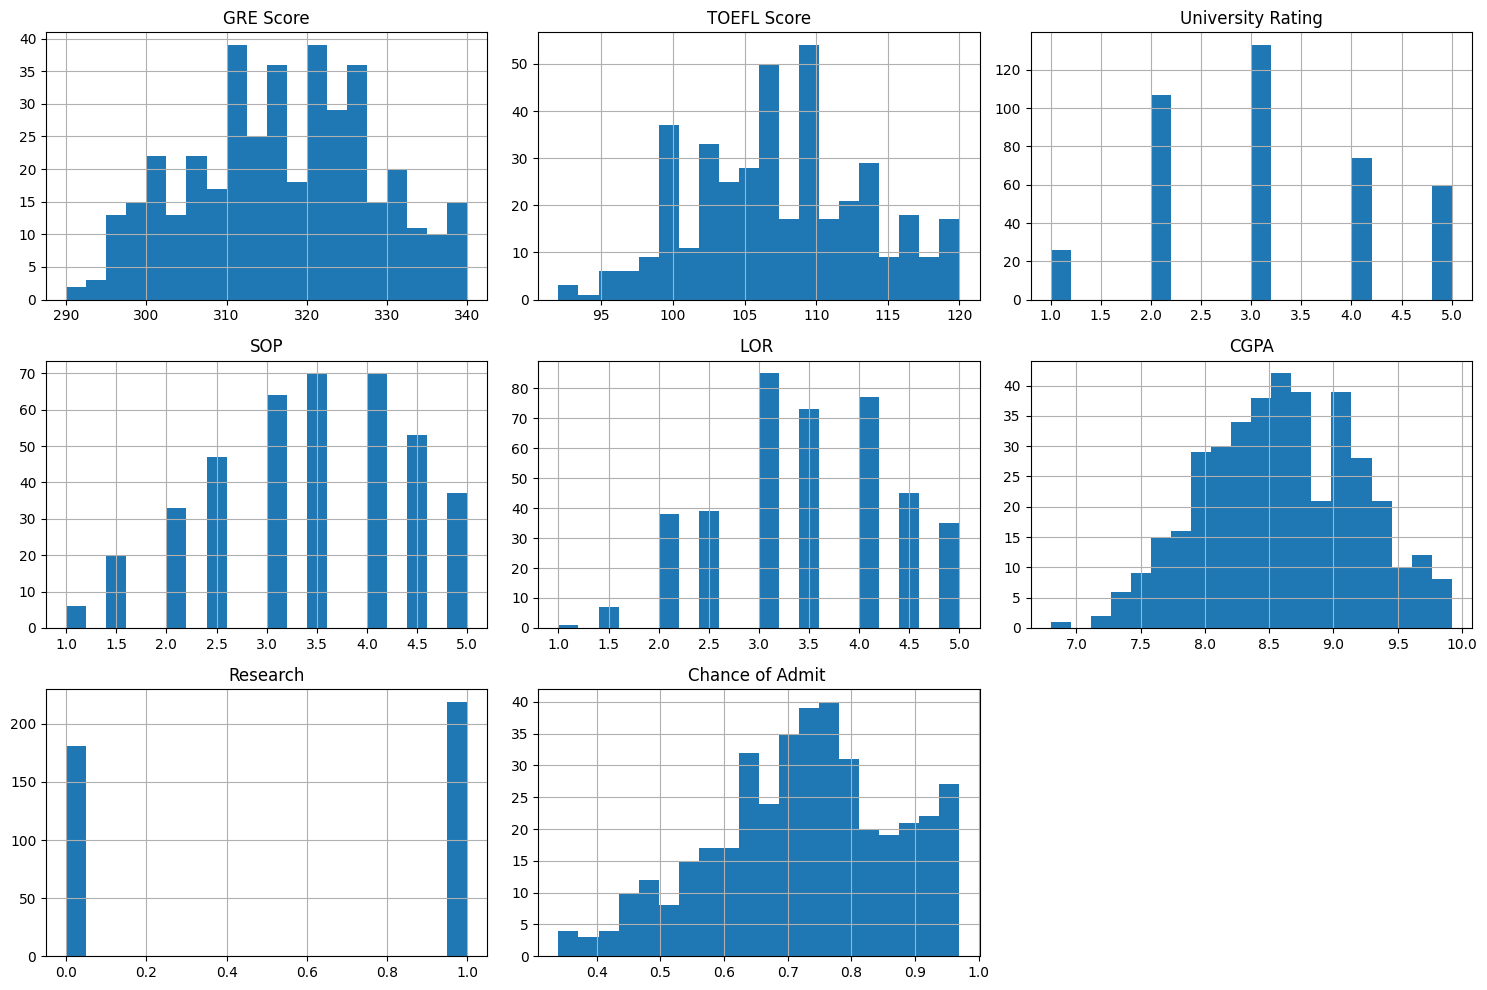

In [286]:
# Plot the histograms for all numerical features at once
df.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

**GRE Score:** Normally Distributed.

**TOEFL Score:** Mainly Normally distributed.

**University Rating:** As it's categorical the reasons it show difference in plot rest it is discrete distribution.

**SOP:** -ive skewed

**LOR:** -ive skewed

**CGPA:** -ive skewed

**Research:** as it's based on binary and have categorical so it's high on 1 and minimal down at 0.
  
**Chance of Admission:** -ive skewed

#**Scatter Plot**
A scatter plot is a **2D graph that shows the relationship between two numerical variables using dots.**

The spread or pattern of these dots helps us understand the nature of their relationship.
* If the **dots** form a **straight-line pattern**, it indicates a** linear relationship.**
* If they are **scattered without any pattern**, it **suggests no strong correlation.**

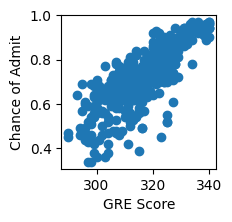

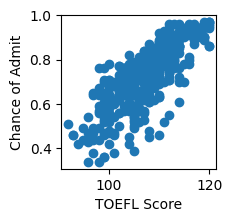

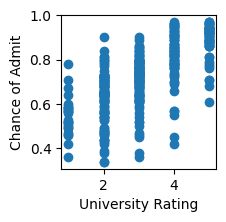

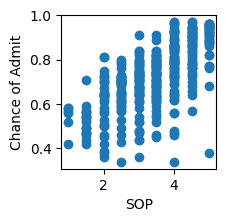

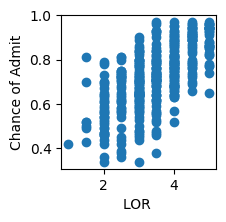

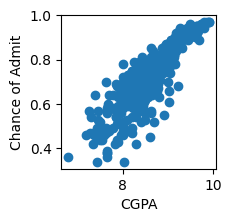

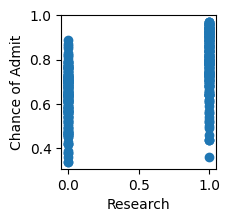

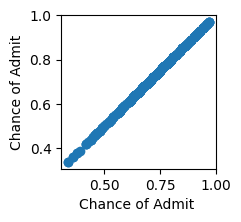

In [287]:
for a in df.columns:
  plt.figure(figsize=(2,2))
  plt.scatter(df[a], df["Chance of Admit "])
  plt.xlabel(a)
  plt.ylabel("Chance of Admit")

  plt.show()

Here, **Countinous columns create strongest Co-relation with Target Variavble 'Chance of Admission'**.
*Rest Categorical seems okay but here more grip get by countinous.

#**Scatter Matrix Path from EDA TO ML MODEL TRAINING**

* 1. It is specifically for numeric columns if data in categoriacl column in (Text) after imputation of encoding those columns are eligible to consider their. Since scatter plots are based on coordinate axes, this technique only works with numeric data types (like int or float). Categorical (text) columns must be dropped or encoded  but generally,scatter matrix is not used for them.

* 2. Scatter matrix (or pair plot) helps visualize relationships between all columns one by one showing how each feature interacts with the others.

* 3. The visual patterns help in deciding which machine learning models might suit the dataset — for example, linear relationships favor Linear Regression, while scattered or grouped data might perform better with Decision Trees, Random Forests, or KNN.

* 4. It also supports feature selection by identifying which columns show strong, weak, or no correlation — guiding what to include in training.

    **This all are basic Four aspects of Scatter Matrix.**


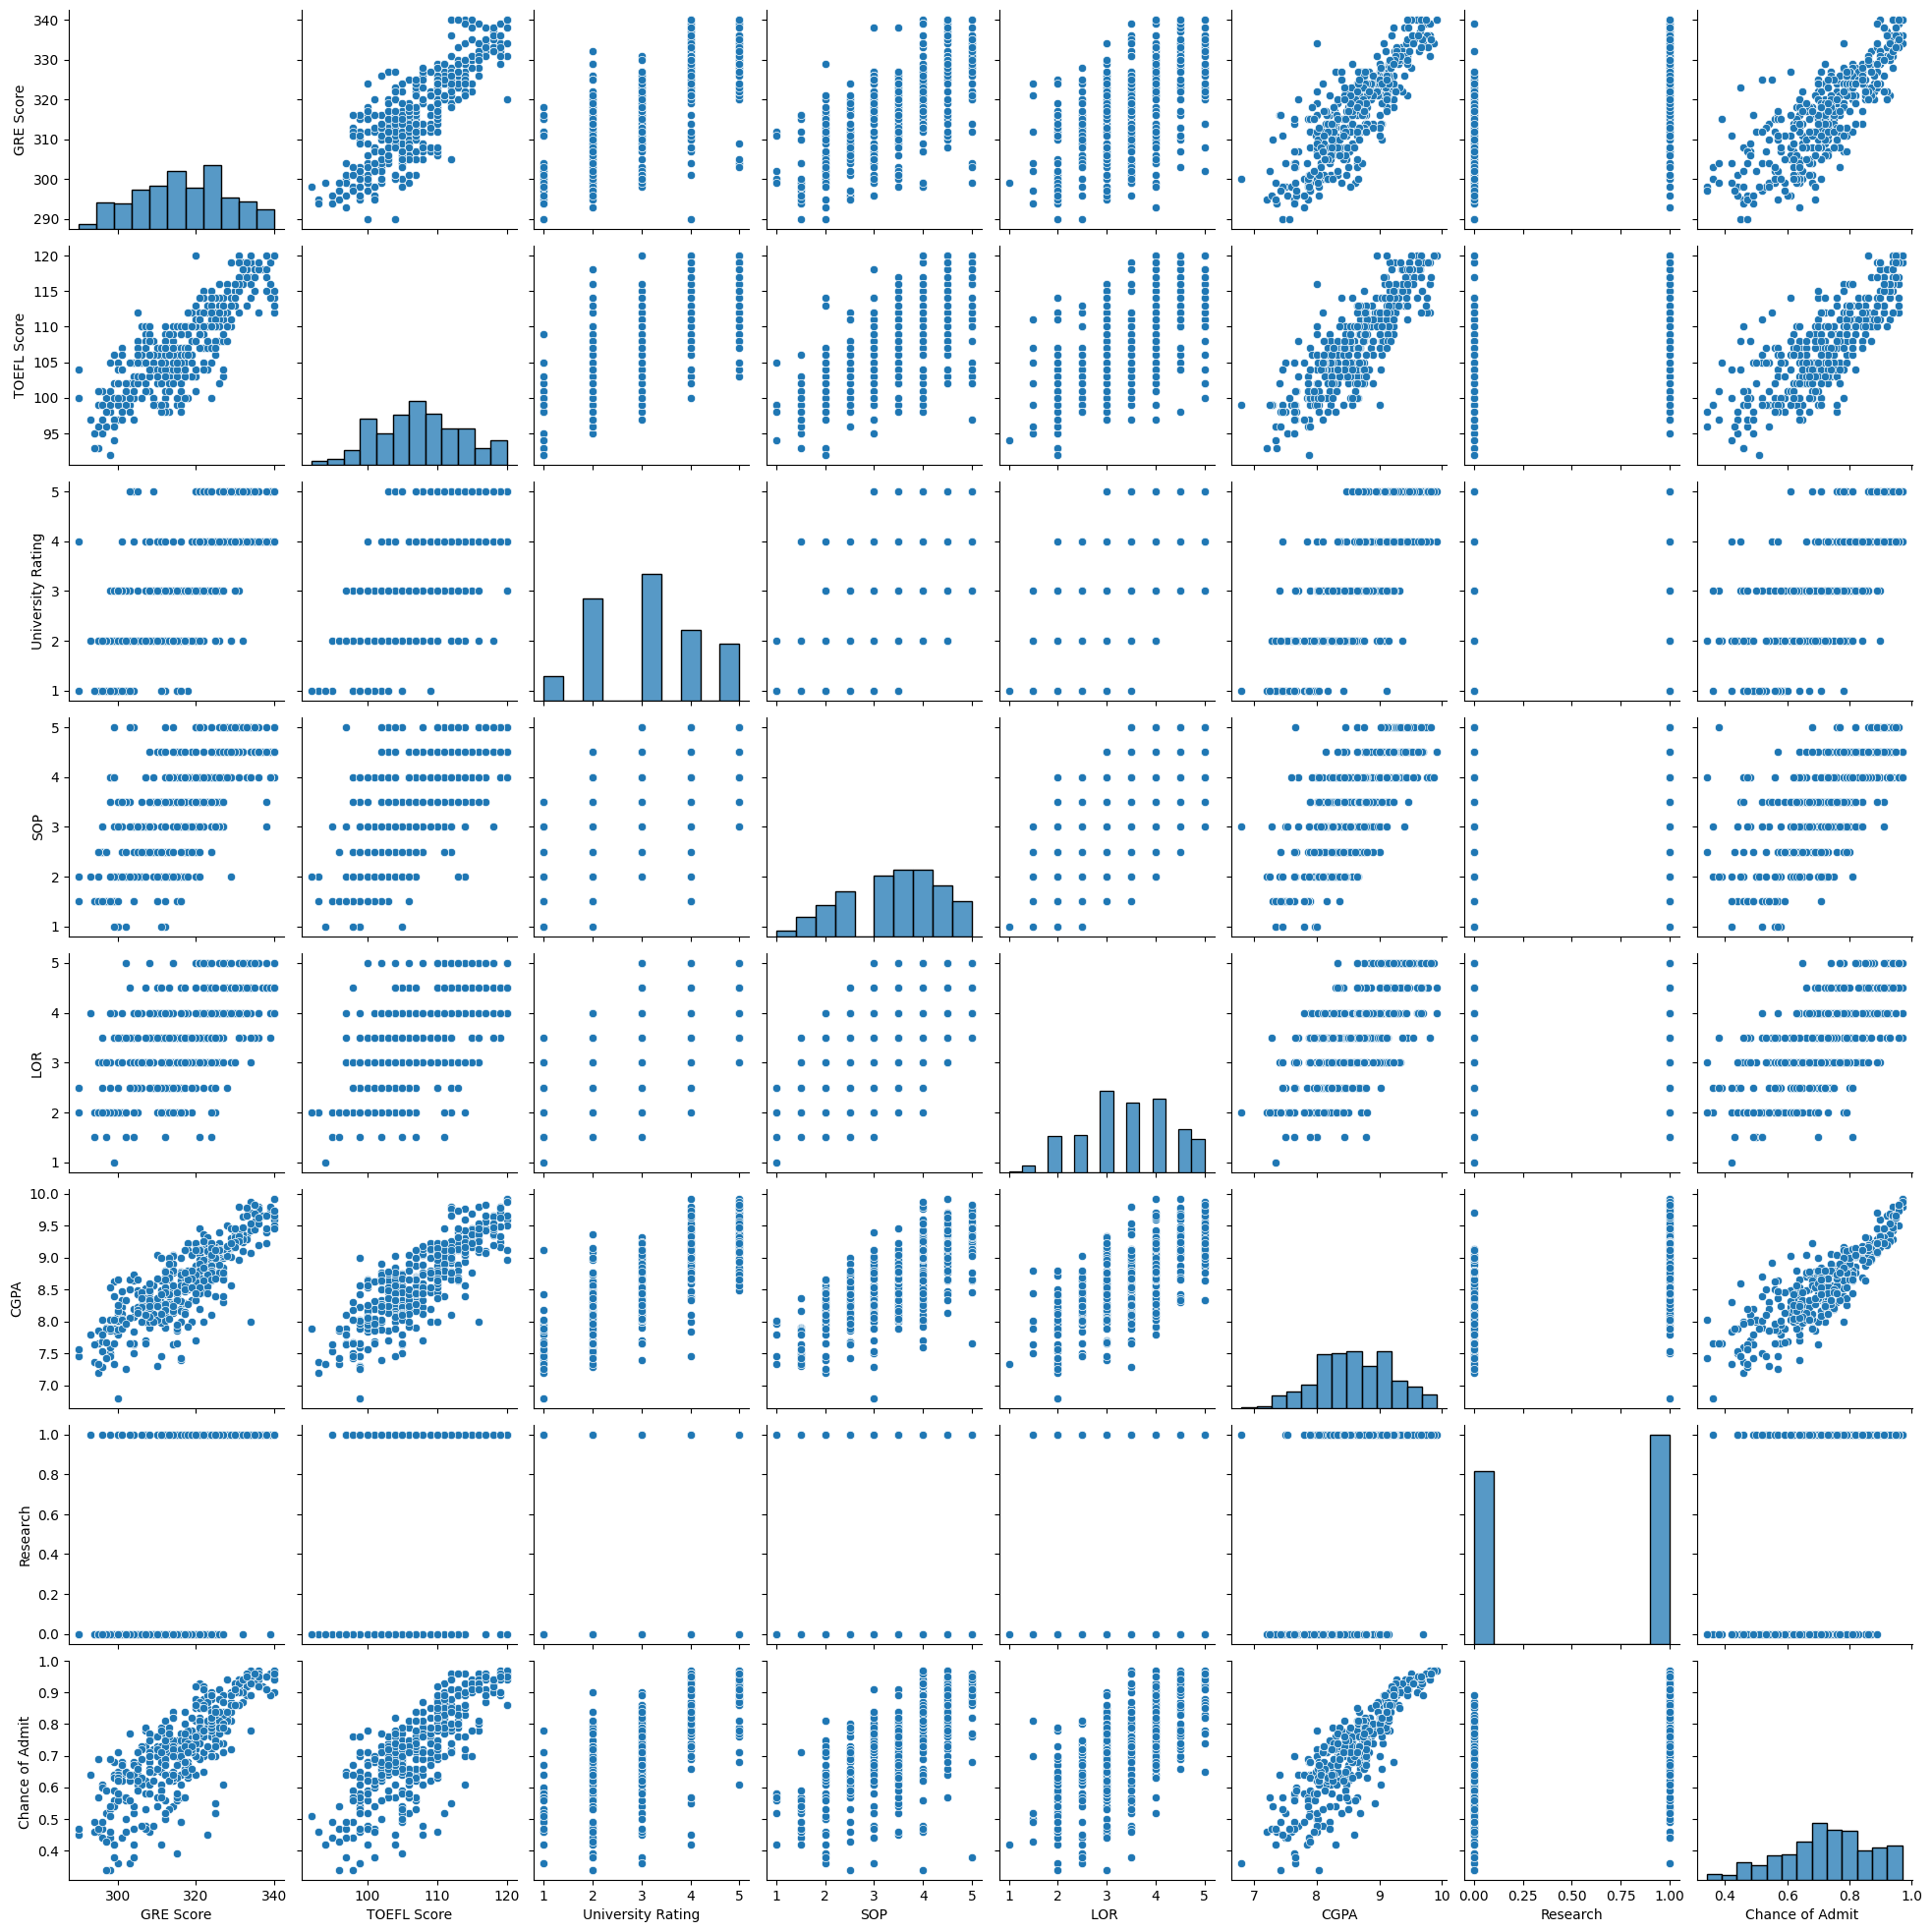

In [288]:
sns.pairplot(df)
plt.show()

# **STEP # 2 Feature Engineering**

# **Correlation Heatmap**

* Correlation helps us identify which **input (independent) variables** have the strongest relationship **(bond)** with the output **(target)** variable.

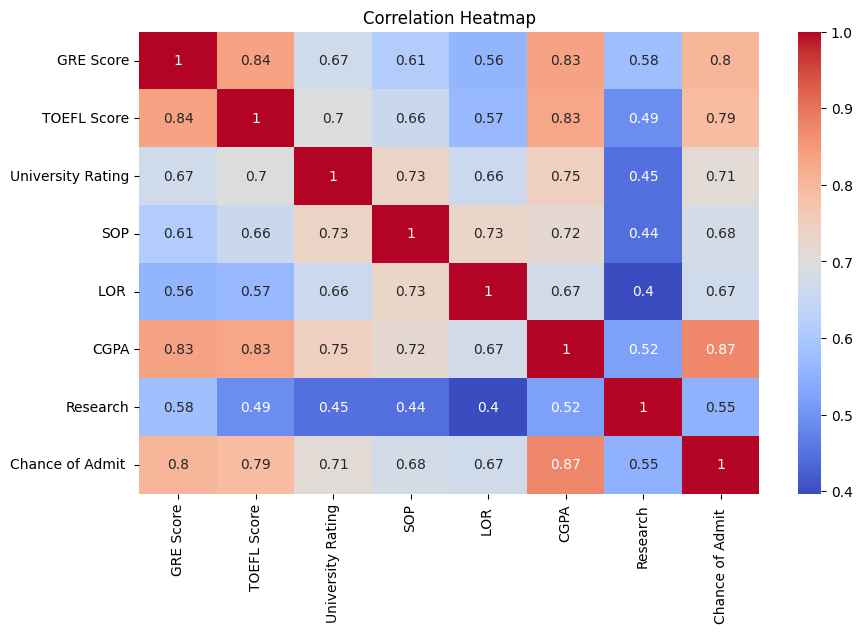

In [289]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# **Min-Max Scaling (Normalization)**



In [290]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


In [291]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
df_scaled[0] #Shows the first row as an 1D array

array([0.94      , 0.92857143, 0.75      , 0.875     , 0.875     ,
       0.91346154, 1.        , 0.92063492])

In [292]:
#Covert to data frame
df_scaled = pd.DataFrame(df_scaled, columns = df.columns)
df_scaled

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,0.94,0.928571,0.75,0.875,0.875,0.913462,1.0,0.920635
1,0.68,0.535714,0.75,0.750,0.875,0.663462,1.0,0.666667
2,0.52,0.428571,0.50,0.500,0.625,0.384615,1.0,0.603175
3,0.64,0.642857,0.50,0.625,0.375,0.599359,1.0,0.730159
4,0.48,0.392857,0.25,0.250,0.500,0.451923,0.0,0.492063
...,...,...,...,...,...,...,...,...
395,0.68,0.642857,0.50,0.625,0.625,0.717949,1.0,0.761905
396,0.70,0.535714,0.50,0.500,0.625,0.740385,1.0,0.793651
397,0.80,0.857143,0.75,1.000,0.875,0.849359,1.0,0.904762
398,0.44,0.392857,0.50,0.625,0.750,0.634615,0.0,0.523810


**Histogram after Scaling**

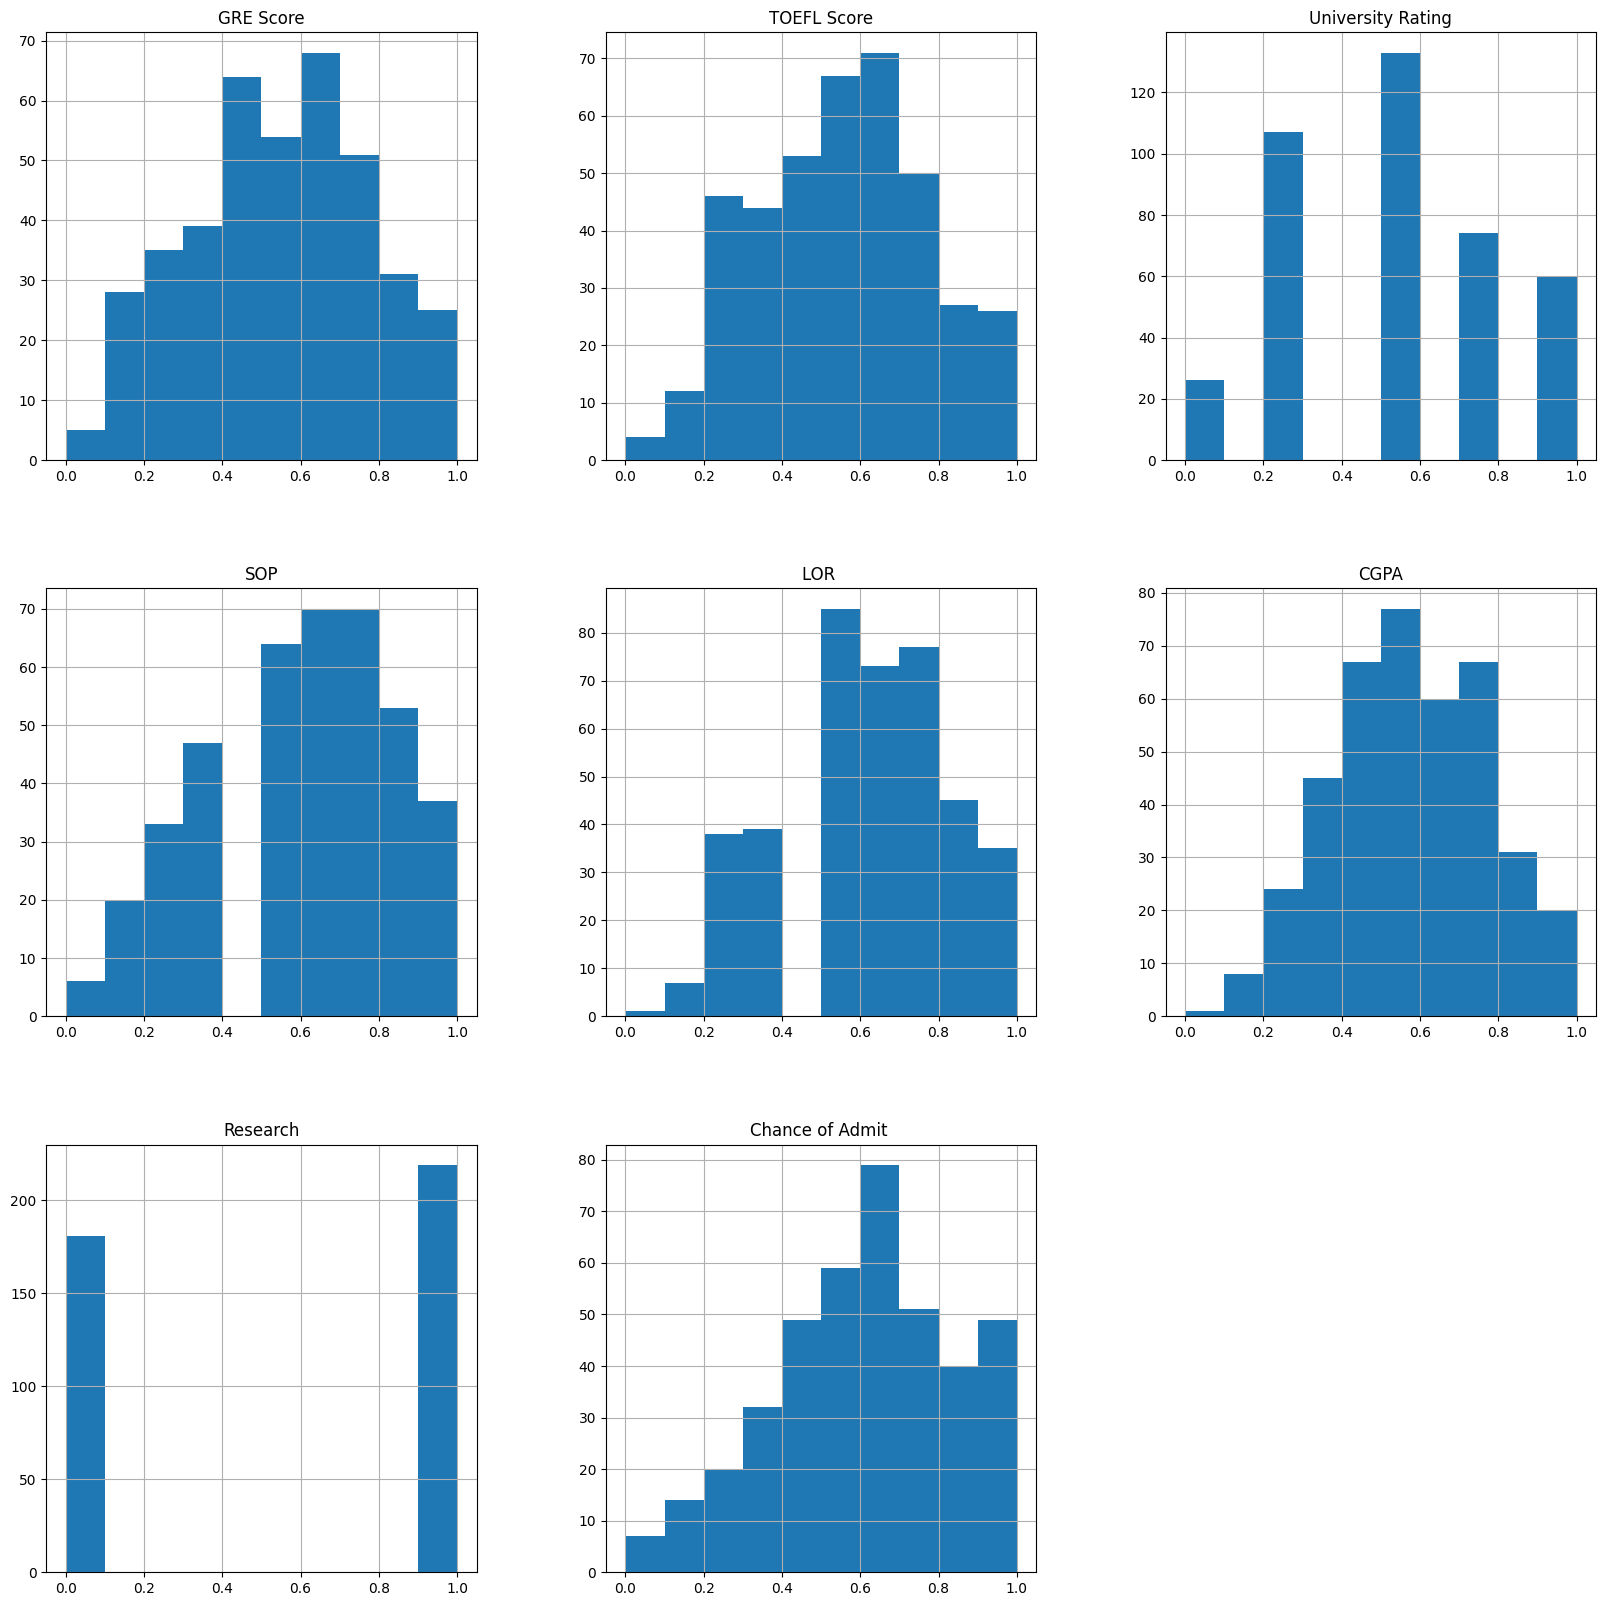

In [293]:
df_scaled.hist(figsize=(20,20))
plt.show()

In Comparision, before Scaling Histogram now features are scaled and ready to proceed for Model Traning

# **Standard Scaling (Z-score Normalization)**

* **scaler = StandardScaler()**
Creates a scaler to standardize data.

* **df_scaled = scaler.fit(df)**
Calculates the mean and standard deviation for each column but doesn’t change the data yet.

To actually scale the data, as we required;

* **df_scaled = scaler.fit_transform(df)**
This changes the data to have mean = 0 and standard deviation = 1.

In [294]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit(df)
df_scaled

StandardScaler()

# **STEP # 3 MODEL TRAINING**

In [299]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [300]:
features = ['GRE Score', 'TOEFL Score', 'CGPA', 'University Rating', 'SOP', 'LOR ', 'Research']
target = 'Chance of Admit '

In [301]:
X = df[features]
y = df[target]

In [302]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **Linear Regression**

In [303]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)

# **Decision Tree Regressor**

In [304]:
dt = DecisionTreeRegressor(max_depth=4, random_state=42)
dt.fit(X_train, y_train)
dt_preds = dt.predict(X_test)

# **Random Forest Regressor**

In [305]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

# **Evaluation Metrics**

In [307]:
print("Linear Regression MSE:", mean_squared_error(y_test, lr_preds))
print("Linear Regression R2:", r2_score(y_test, lr_preds))



Linear Regression MSE: 0.004617003377285007
Linear Regression R2: 0.8212082591486993


In [308]:
print("Decision Tree MSE:", mean_squared_error(y_test, dt_preds))
print("Decision Tree R2:", r2_score(y_test, dt_preds))



Decision Tree MSE: 0.005368133683445525
Decision Tree R2: 0.7921210170415511


In [309]:
print("Random Forest MSE:", mean_squared_error(y_test, rf_preds))
print("Random Forest R2:", r2_score(y_test, rf_preds))

Random Forest MSE: 0.004931220875000001
Random Forest R2: 0.8090403032622474


# **Feature Importance from Random Forest**

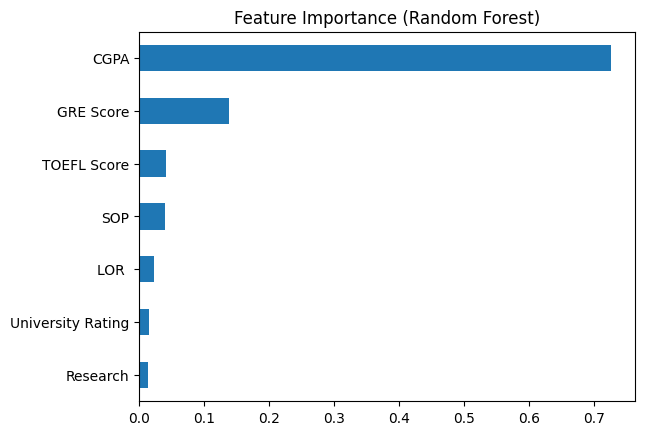

In [310]:
importances = pd.Series(rf.feature_importances_, index=features).sort_values()
importances.plot(kind='barh', title='Feature Importance (Random Forest)')
plt.show()

# **Decision Tree Visualization**

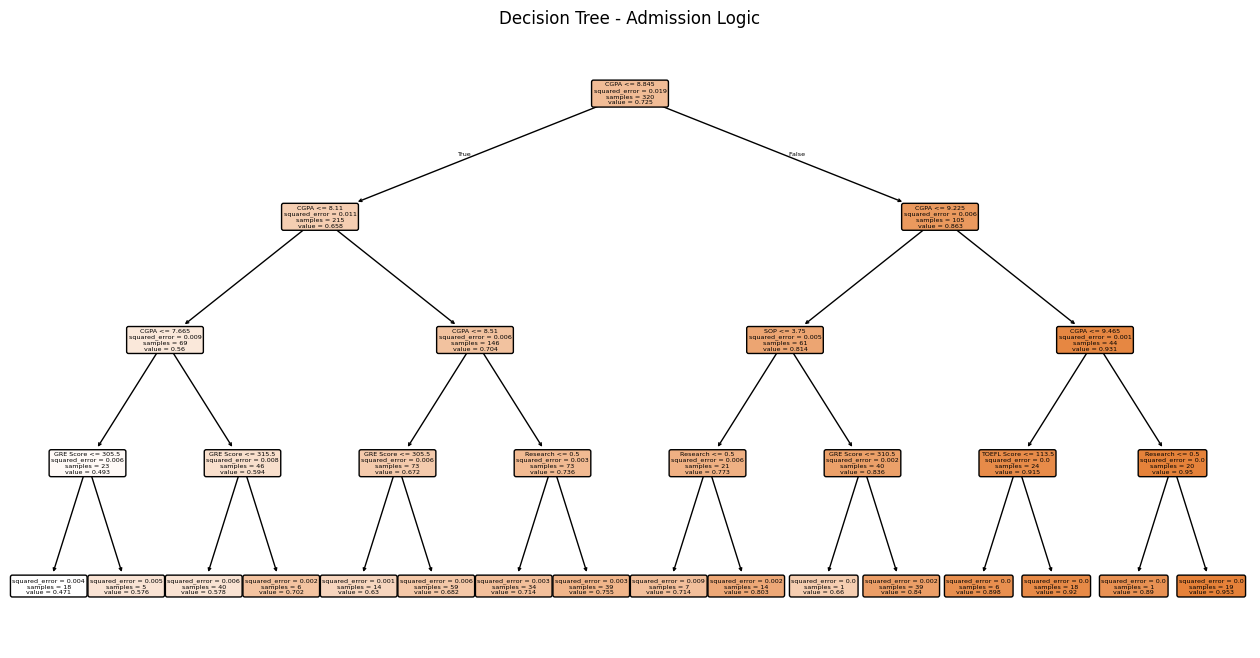

In [311]:
plt.figure(figsize=(16, 8))
plot_tree(dt, feature_names=features, filled=True, rounded=True)
plt.title("Decision Tree - Admission Logic")
plt.show()

# **Hypothetical Applicant Prediction**

In [316]:
applicant_data = pd.DataFrame([{
    'GRE Score': 322,
    'TOEFL Score': 111,
    'CGPA': 8.9,
    'University Rating': 3,
    'SOP': 4,
    'LOR ': 4,
    'Research': 1
}])


In [317]:
#Linear Regression
lr_app_pred = lr.predict(applicant_data)[0]

#Decision Tree Regressor
dt_app_pred = dt.predict(applicant_data)[0]

#Random Forest Regressor
rf_app_pred = rf.predict(applicant_data)[0]


In [318]:
print(f"Applicant predicted admit probability (Linear Regression): {lr_app_pred:.2f}")
print(f"Applicant predicted admit probability (Decision Tree): {dt_app_pred:.2f}")
print(f"Applicant predicted admit probability (Random Forest): {rf_app_pred:.2f}")

Applicant predicted admit probability (Linear Regression): 0.80
Applicant predicted admit probability (Decision Tree): 0.84
Applicant predicted admit probability (Random Forest): 0.80


# **Scholarship Recommendation Logic**

In [319]:
if rf_app_pred > 0.70 and applicant_data['CGPA'].values[0] >= 8.5:
    print("Recommend for scholarship.")
else:
    print("Do not recommend for scholarship.")

Recommend for scholarship.


In [321]:
import pickle
import os

# Define the directory path
output_dir = '/content/drive/MyDrive/MlProject/'

# Create the directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Assume model is your trained ML model (using the correct variable name 'rf')
with open(os.path.join(output_dir, 'my_modelGTU.pkl'), 'wb') as file: # Save to a specific directory
        pickle.dump(rf, file)